# IN4080 - Natural Language processing

### Mandatory assignment 1

This assignment contains of two parts:
 - __Part A: Text and frequencies__
 - __Part B: Text classification__
 
 

_We import all of our libraries_

In [15]:
import nltk
from nltk.book import *
from nltk.corpus import brown
from urllib import request
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import itertools
import pandas as pd


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Part A: Text and frequencies

__Exercise 1__ : Conditional frequency distributions

__a)__ Conduct a similar experiment as the one mentioned above with the genres: news, religion, government, fiction, romance as conditions, and occurrences of the words: he, she, her, him, as events. Make a table of the conditional frequencies and deliver code and table.

In [150]:
genres = ['news','religion','government','fiction','romance']
pronouns = ['he','she','her','him']

cfd = nltk.ConditionalFreqDist((genre,word)for genre in genres
                               for word in brown.words(categories=genre))
cfd.tabulate(samples=pronouns)

            he she her him 
   fiction 813 280 397 375 
government 120   0   3  25 
      news 451  42 103  93 
  religion 137  10   8  60 
   romance 702 496 651 339 


__b)__ Answer in words what you see. How does gender vary with the genres?

It is clearly that the word 'he' is used quite more than 'she', 'her', 'him' in all genres. The reason for that can be that there are many more men that represents the main character in most of the genres, especially these genres we are looking at right now. But we can also see that the feminine objective is used more than 'him' in the genre of romance, but used less in religion and government. This does make sense, due to that most of romance genres is more woman oriented rather then men while the matter is total oppsite in the case of religion and government.


__Ha__: _The relative frequency of the objective form, her, of the feminine personal pronoun (she or her) is higher than the relative frequency of the objective form, him, of the masculine personal pronoun, (he or him)._

__c)__ First, consider the complete Brown corpus. Construct a conditional frequency distribution, which uses gender as condition, and for each gender counts the occurrences of nominative forms (he, she) and objective forms (him, her). Report the results in a two by two table. Then calculate the relative frequency of her from she or her, and compare to the relative frequency of him from he or him. Report the numbers. Submit table, numbers and code you used.

In [151]:
genders = ['Male', 'Female']

cfd = nltk.ConditionalFreqDist()
for word in brown.words():
    word = word.lower()
    if word == 'he' or word == 'him':
        cfd[genders[0]][word] += 1
    if word == 'she' or word == 'her':
        cfd[genders[1]][word] += 1
cfd.tabulate(samples = pronouns)

         he  she  her  him 
Female    0 2860 3036    0 
  Male 9548    0    0 2619 


In [152]:
def summationn(gender):
    sum_frequency = 0
    for i in cfd[gender]:
        sum_frequency += cfd[gender][i]
    return sum_frequency

male_relative_frequency = cfd['Male']['him']/(summationn('Male'))
female_relative_frequency = cfd['Female']['her']/(summationn('Female'))

print(f'Relative frequency of him: {male_relative_frequency:3.5f}')
print(f'Relative frequency of her: {female_relative_frequency:3.5f}')

Relative frequency of him: 0.21525
Relative frequency of her: 0.51493


It is tempting to conclude from this that the objective form of the feminine pronoun is relatively more frequent than the objective form of the male pronoun. Beware, however, her is not only the feminine equivalent of him, but also of his. So what can we do? We could do a similar calculation as in point (b), comparing the relative frequency of her –not to the relative frequency of him –but compare her + hers to him + his. That might give relevant information, but it does not check the hypothesis, __Ha__


__d)__

In [153]:
tag_brown = [x for x in brown.tagged_words(tagset='universal')]

PP_pron = ['she','he','her','him']
POSS_pron = ['her','his','hers']
Tot_pron = set(PP_pron + POSS_pron )

cfd_new = nltk.ConditionalFreqDist()

def new_CFD(pronLst, pronType):
    for i in range(len(tag_brown)):
        word = tag_brown[i][0].lower()
        if word in pronLst and tag_brown[i][1] == pronType:
            cfd_new[tag_brown[i][1]][word] += 1
new_CFD(PP_pron,'PRON')
new_CFD(POSS_pron,'DET')

cfd_new.tabulate(samples = Tot_pron)

      him  her  his  she hers   he 
 DET    0 1929 6957    0    0    0 
PRON 2619 1107    0 2860    0 9546 


__e)__ We can now correct the numbers from point (b) above. How large percentage of the feminine personal pronoun occurs in nominative form and in objective form? What are the comparable percentages for the masculine personal pronoun?

In [154]:
def summation(typPron,lstPron):
    sum_frequency = 0
    for word in lstPron:
        sum_frequency += cfd_new[typPron][word]
    return sum_frequency


#'d_her' stands for determiner her, 
#'p_her' stands for pronoun her,
#'n_she' stands for noun she.
d_her = cfd_new['DET']['her']/summation('DET',POSS_pron) 
p_her = cfd_new['PRON']['her']/summation('DET',PP_pron)
n_she = cfd_new['PRON']['she']/summation('PRON',PP_pron)


d_him = cfd_new['DET']['him']/summation('DET',POSS_pron) 
n_he = cfd_new['PRON']['he']/summation('PRON',PP_pron)

print(f'Relative frequency of him as possessive pronoun: {d_him:3.5f}')
print(f'Relative frequency of her as possessive pronoun: {d_her:3.5f}')
print(f'Relative frequency of her as objective pronoun: {p_her:3.5f}')

Relative frequency of him as possessive pronoun: 0.00000
Relative frequency of her as possessive pronoun: 0.21708
Relative frequency of her as objective pronoun: 0.57387


__f)__ Illustrate the numbers from (d) with a bar chart.

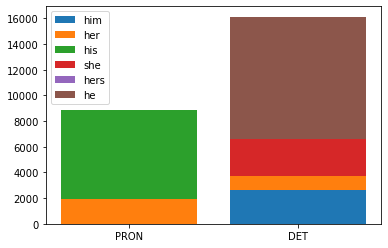

In [155]:
xticks = cfd_new.keys()

x = np.arange(0,len(cfd_new.keys()))
h = np.zeros(len(cfd_new.keys()))

for i, p in enumerate(Tot_pron):
    y = []
    for j, genre in enumerate(['DET','PRON']):
        y.append(cfd_new[genre][p])
    plt.bar(x,y, label = p, bottom = h)
    h += y
plt.xticks(np.arange(0, len(xticks)), xticks)
plt.legend()
plt.show()

__g)__ The Brown corpus is an electronic collection of text samples of American English, the first major structured corpus of varied genres. It was published back in 1961. And in that time more of masculine pronouns were more frequent than feminine pronoun in general. E.g government and religion were two of those fields were masculine pronouns were dominant, we can see that as well in our data analysis. Given in __(a)__ the pronoun _"her"_ and _"she"_ is mentioned about three times in the genre of government. And in task __(f)__ we can see that _"her"_ is distributed over two times for possessive and objetive pronouns. Which tells the difference between masculine and feminine pronouns in this age of time and what matter it cost for these genres, that in that time age the masculine pronouns were the dominant pronouns in these genres.  

__Exercise 2__ : Downloading texts and Zipf’s law

__a)__ We open up the URL by using urllib package using request. 

In [156]:
url = "http://www.gutenberg.org/files/74/74-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8')

# We will split the data to a list by following command.
raw_data_list = raw.split()

__b)__ Do some clean up and slice up the file so that we exclude preamble,appendix and copyrights section.

In [157]:
# Marking where start and end will be so that 
# we'll slice later in raw_data_list.

Remove_start = [i for i in range(len(raw_data_list)) if raw_data_list[i]== "1876."]
Remove_end = [i for i in range(len(raw_data_list)) if raw_data_list[i]=="***"]

#Slicing so that we exclude preamble,appendix and copyrights. 
raw_data_list = raw_data_list[Remove_start[0]+1:Remove_end[2]]

__c)__

In [163]:
#Initiate nltk for all tokens.
tokens = nltk.word_tokenize(raw)

#Removing all dots.
tokens = [token.replace('.','') for token in tokens]

#Removing all underscores
tokens = [token.replace('_','')for token in tokens]

#Remove all punctuations
Pat_punc = re.compile('^\&$-+')
tokens = [token for token in tokens if not Pat_punc.match(token)]

#Removing empty lines
tokens = [token for token in tokens if token != '']
tokens = [token.lower() for token in tokens]

__d)__ Use the nltk.FreqDist() to count the words. Report the 20 most frequent words in a table with their absolute frequencies.

In [187]:
Frq_dist = nltk.FreqDist(tokens)
twenty_most_freq_words = Frq_dist.most_common(21)

for i, (word, freq) in enumerate(twenty_most_freq_words):
    print(f'Pos: {i} , Token: " {word} " , Freq: {freq} ')
    

    


Pos: 0 , Token: " , " , Freq: 5080 
Pos: 1 , Token: " the " , Freq: 3939 
Pos: 2 , Token: " and " , Freq: 3072 
Pos: 3 , Token: " ’ " , Freq: 2435 
Pos: 4 , Token: " a " , Freq: 1874 
Pos: 5 , Token: " to " , Freq: 1795 
Pos: 6 , Token: " of " , Freq: 1587 
Pos: 7 , Token: " “ " , Freq: 1534 
Pos: 8 , Token: " ” " , Freq: 1527 
Pos: 9 , Token: " it " , Freq: 1283 
Pos: 10 , Token: " he " , Freq: 1234 
Pos: 11 , Token: " was " , Freq: 1168 
Pos: 12 , Token: " that " , Freq: 1011 
Pos: 13 , Token: " in " , Freq: 1008 
Pos: 14 , Token: " i " , Freq: 962 
Pos: 15 , Token: " you " , Freq: 944 
Pos: 16 , Token: " s " , Freq: 867 
Pos: 17 , Token: " his " , Freq: 819 
Pos: 18 , Token: " tom " , Freq: 798 
Pos: 19 , Token: " with " , Freq: 689 
Pos: 20 , Token: " t " , Freq: 671 


__e)__ 
Consider the frequencies of frequencies. How many words occur only 1 time? How many words occur n times, etc. for n = 1, 2, ..., 10; how many words have between 11 and 50 occurrences; how many have 51-100 occurrences; and how many words have more than 100 occurrences? Report in a table!

In [255]:
Lst = []
print(len(set(Frq_dist.values())))
Count = Counter(Frq_dist.values())
for i in range(1,11):
    Lst.append([i,Count[i]])
    
#11-50 times occurence 
occur_11_50 = [key for key in Count.keys() if 11 <= key <= 50]
sum_11_50 = sum(Count[key] for key in occur_11_50)
Lst.append(['11-50',sum_11_50])

#50-100 times occurence 
occur_50_100 = [key for key in Count.keys() if 50 <= key <= 100]
sum_50_100 = sum(Count[key] for key in occur_50_100)
Lst.append(['50-100',sum_50_100])

# 100+ times occurence 
occur_100more = [key for key in Count.keys() if key > 100]
sum_100more = sum(Count[key] for key in occur_100more)
Lst.append(['100+',sum_100more])

for freq, words in Lst:
    print(f'Frequency: {freq}, number of words: {words}')

187
Frequency: 1, number of words: 4675
Frequency: 2, number of words: 1315
Frequency: 3, number of words: 624
Frequency: 4, number of words: 426
Frequency: 5, number of words: 232
Frequency: 6, number of words: 175
Frequency: 7, number of words: 156
Frequency: 8, number of words: 128
Frequency: 9, number of words: 82
Frequency: 10, number of words: 88
Frequency: 11-50, number of words: 520
Frequency: 50-100, number of words: 102
Frequency: 100+, number of words: 112


__f)__ We order the words by their frequencies, the most frequent word first. Let r be the frequency rank for each word and n its frequency. Hence, the most frequent word gets rank 1, the second most frequent word gets rank two, and so on. According to Zipf’s law, r * n should be nearly constant. Calculate r*n for the 20 most frequent words and report in a table. How well does this fit Zipf’s law? Answer in text.


In [284]:
for index, (word,freq) in enumerate(twenty_most_freq_words, 1):
    print(f'Rank: {index}, r*n: {(index*freq)}')


Rank: 1, r*n: 5080
Rank: 2, r*n: 7878
Rank: 3, r*n: 9216
Rank: 4, r*n: 9740
Rank: 5, r*n: 9370
Rank: 6, r*n: 10770
Rank: 7, r*n: 11109
Rank: 8, r*n: 12272
Rank: 9, r*n: 13743
Rank: 10, r*n: 12830
Rank: 11, r*n: 13574
Rank: 12, r*n: 14016
Rank: 13, r*n: 13143
Rank: 14, r*n: 14112
Rank: 15, r*n: 14430
Rank: 16, r*n: 15104
Rank: 17, r*n: 14739
Rank: 18, r*n: 14742
Rank: 19, r*n: 15162
Rank: 20, r*n: 13780
Rank: 21, r*n: 14091


__g__) Try to plot the rank against frequency for all words (not only the 20 most frequent ones). First, make a plot where you use linear scale on the axes. Then try to make a plot similarly to the Wikipedia figure below with logarithmic scales at both axes. Logarithms are available in numpy, using functions functions like log(), for the natural logarithm, and log2() for the base- 2 logarithm. An alternative to using one of these functions is to explore loglog() plotting from matplotlib.pyplot directly.

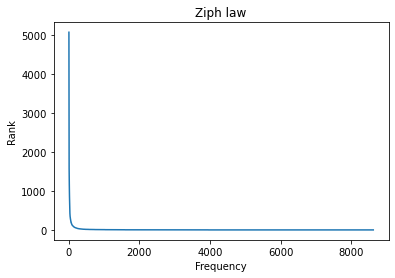

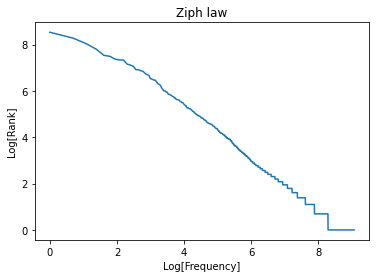

In [293]:
x = list(range(1,len(Frq_dist)+1))
y= list(Frq_dist.values())
y.sort(reverse=True)
plt.plot(x,y)
plt.title('Ziph law')
plt.xlabel('Frequency')
plt.ylabel('Rank')
plt.show()

x1 = np.log(x)
y1 = np.log(y)
plt.plot(x1,y1)
plt.title('Ziph law')
plt.xlabel('Log[Frequency]')
plt.ylabel('Log[Rank]')

plt.show()



### Part B: Text classification

__In this part you will get experience with__
* setting up and running experiments
* splitting your data into development and test data • models for text classification
* Naive Bayes vs Logistic Regression
* the scikit-learn toolkit
* vectorization of categorical data
* n-fold cross-validation


__Exercise 1__ : Initial Classifier

Start by importing important packages for this part.

In [1]:
import nltk
import random
import numpy as np
import scipy as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from nltk.corpus import movie_reviews

In [2]:
from nltk.corpus import movie_reviews

In [3]:
raw_movie_docs = [(movie_reviews.raw(fileid), category) for 
                  category in movie_reviews.categories() for fileid in 
                  movie_reviews.fileids(category)]

In [4]:
random.seed(1996)
random.shuffle(raw_movie_docs)
movie_test = raw_movie_docs[:200]
movie_dev  = raw_movie_docs[200:]

In [5]:

dev_test_data = movie_dev[:1600]
train_data = movie_dev[1600:]

train_text = [text for text, label in train_data]
train_targ = [label for text, label in train_data]

dev_test_text = [text for text, label in dev_test_data]
dev_test_targ = [label for text, label in dev_test_data]

v = CountVectorizer()
v.fit(train_text)


training_vec = v.transform(train_text)
dev_test_vec = v.transform(train_text)

clf = MultinomialNB()
clf.fit(training_vec,train_targ)

print(dev_test_text)
print(clf.score(dev_test_vec, dev_test_targ))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: Found input variables with inconsistent numbers of samples: [1600, 200]

__I Did not manage to do the rest of the assignment, due to lack of responsibility and time management, The code above does not fully function__